<a href="https://www.kaggle.com/code/natsu18/pg-s4e2-ensemble-xgb-lgb-catboost-optuna?scriptVersionId=162417369" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <div style="border: 2px solid #BBA0CA; padding: 20px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">
        <h1 style="color: #583B68; font-size: 32px; text-transform: uppercase; letter-spacing: 2px; margin-bottom: 20px;">EDA & modelling using Ensemble Learning</h1>
        <div style="color: #583B68"><em>
       If you like the content please consider an upvote. It is a great motivator to keep sharing code and ideas.
        Thank you!!!
    </em></div>
</div>

<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">Introduction</h1>
    </div></div>

<p>This notebook is created for Multiclass Classification with a Obesity Risk data in the Playground Season-4 Episode-2.
        </p>
        <p>This notebook attempts to perform Exploratory Data Analysis on the Obesity Risk Dataset and eventually train a model on it and enhance the predictions by fine-tuning the model.
        </p>
        <blockquote>  If you find this notebook helpful please consider upvoting ❤️ <br>
    and follow me on twitter <a href="https://twitter.com/yoii186"><b>@yoii186</b></a></blockquote> 
    </div>
</div>

## Contents:
<hr>

1. [Libraries](#Libraries)
2. [Data](#data)
3. [Target Feature](#target)
4. [Exploratory Data Analysis](#eda)
5. [Optimizer](#opt)
6. [Model Training](#model)
7. [Feature Importance](#feature)
8. [Submission](#sub)

### Important Libraries used in the project:

- Numpy
- Pandas
- Matplotlib
- Seaborn
- Scikit-learn
- LighGBM
- XGBoost
- CatBoost
- Optuna
- warnings

### Models used to make predictions:

- LighGBM Classifier
- Optuna for Hyperparameter tuning

Now, let's import the data.

<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">Libraries</h1>
    </div></div>


In [1]:
pip install cmaes

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set the default color palette to "pastel"
sns.set_palette("muted")
import random
import os
from copy import deepcopy
from functools import partial
from itertools import combinations
import random
import gc
import cmaes

# Import sklearn classes for model selection, cross validation, and performance evaluation
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF
from umap import UMAP
from sklearn.manifold import TSNE

# Import libraries for Hypertuning
import optuna

# Import libraries for gradient boosting
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier, Pool

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

2024-02-10 15:48:29.829679: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-10 15:48:29.829885: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-10 15:48:29.991747: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

plt.style.use('seaborn-v0_8-pastel')

<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">1. Data</h1>
    </div></div>



# 1. Data Exploration: <a name="data"></a>
The dataset for this competition (both train and test) was generated from a deep learning model trained on the [Obesity or CVD risk dataset](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/data).

> Submissions are evaluated using the accuracy score.

## 1.1 Data Description:

Here is a quick description of the data which was taken from the original data.

### Features:
- FAVC: Frequent consumption of high caloric food,
- FCVC: Frequency of consumption of vegetables,
- NCP: Number of main meals,
- CAEC: Consumption of food between meals,
- CH20: Consumption of water daily,
- CALC: Consumption of alcohol.
- SCC: Calories consumption monitoring,
- FAF: Physical activity frequency,
- TUE: Time using technology devices,
- MTRANS: Transportation used.
- Gender,
- Age,
- Height and
- Weight.

> In Original data 'TUE', 'FAF', 'CH2O', 'NCP', 'FCVC' columns are categorical with 2 or 3 classes but in the competition data they are numerical so you can keep them as it is or round them to nearest integers to turn them into categorical varibles.

### Targets:
- Underweight: Less than 18.5
- Normal: 18.5 to 24.9
- Overweight: 25.0 to 29.9
- Obesity I: 30.0 to 34.9
- Obesity II: 35.0 to 39.9
- Obesity III: Higher than 40


## 1.2 Import Datasets
Here we import our train-test data and the original data as well. 
<br>
I have also changed the index of original dataset just in case we find it suitable to include in our training dataset.
<br> I have also set a target_col variable which we can use. 

In [4]:
filepath = '/kaggle/input/playground-series-s4e2/'
df_train = pd.read_csv(os.path.join(filepath, 'train.csv'), index_col=[0])
df_test = pd.read_csv(os.path.join(filepath, 'test.csv'), index_col=[0])
original = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')

original = original.reset_index()
original['id'] = original.index + df_test.index[-1] +1
original = original.drop(columns=['index']).set_index('id')

target_col = 'NObeyesdad'

In [5]:
df_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [7]:
original.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
34598,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
34599,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
34600,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
34601,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
34602,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## 1.3 Stats
Here we look at the stats of our datasets. Precisely we are looking at the following:
- Basic stats
- Null values
- Duplicate values
- Unique values

In [8]:
df_train.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Age,20758.000000,23.841804,5.688072,14.000000,20.000000,22.815416,26.000000,61.000000
Height,20758.000000,1.700245,0.087312,1.450000,1.631856,1.700000,1.762887,1.975663
Weight,20758.000000,87.887768,26.379443,39.000000,66.000000,84.064875,111.600553,165.057269
FCVC,20758.000000,2.445908,0.533218,1.000000,2.000000,2.393837,3.000000,3.000000
NCP,20758.000000,2.761332,0.705375,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,20758.000000,2.029418,0.608467,1.000000,1.792022,2.000000,2.549617,3.000000
FAF,20758.000000,0.981747,0.838302,0.000000,0.008013,1.000000,1.587406,3.000000
TUE,20758.000000,0.616756,0.602113,0.000000,0.000000,0.573887,1.000000,2.000000


In [9]:
df_test.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Age,13840.000000,23.952740,5.799814,14.000000,20.000000,22.906342,26.000000,61.000000
Height,13840.000000,1.698934,0.088761,1.450000,1.631662,1.700000,1.760710,1.980000
Weight,13840.000000,87.384504,26.111819,39.000000,65.000000,83.952968,111.157811,165.057269
FCVC,13840.000000,2.442898,0.531606,1.000000,2.000000,2.358087,3.000000,3.000000
NCP,13840.000000,2.750610,0.710927,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,13840.000000,2.032044,0.611230,1.000000,1.771781,2.000000,2.552388,3.000000
FAF,13840.000000,0.974532,0.840361,0.000000,0.001086,1.000000,1.571865,3.000000
TUE,13840.000000,0.611033,0.608005,0.000000,0.000000,0.552498,1.000000,2.000000


In [10]:
df_train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [11]:
df_test.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [12]:
print("Duplicates in train data: ", df_train.duplicated().sum())
print("Duplicates in original data: ", original.duplicated().sum())

Duplicates in train data:  0
Duplicates in original data:  24


In [13]:
def unique_vals(df, name=None):
    for col in df_test.columns:
        print(f"Unique values in {col}-{name}: {df[col].nunique()}")

unique_vals(df_train, 'Training Data')
print("\n")
unique_vals(original, 'Original Data')

Unique values in Gender-Training Data: 2
Unique values in Age-Training Data: 1703
Unique values in Height-Training Data: 1833
Unique values in Weight-Training Data: 1979
Unique values in family_history_with_overweight-Training Data: 2
Unique values in FAVC-Training Data: 2
Unique values in FCVC-Training Data: 934
Unique values in NCP-Training Data: 689
Unique values in CAEC-Training Data: 4
Unique values in SMOKE-Training Data: 2
Unique values in CH2O-Training Data: 1506
Unique values in SCC-Training Data: 2
Unique values in FAF-Training Data: 1360
Unique values in TUE-Training Data: 1297
Unique values in CALC-Training Data: 3
Unique values in MTRANS-Training Data: 5


Unique values in Gender-Original Data: 2
Unique values in Age-Original Data: 1402
Unique values in Height-Original Data: 1574
Unique values in Weight-Original Data: 1525
Unique values in family_history_with_overweight-Original Data: 2
Unique values in FAVC-Original Data: 2
Unique values in FCVC-Original Data: 810
Unique 

## 1.4 Analysis
A little analysis of our datasets:
- No null values in train and test dataset
- We have the following categorical variables:
    - Gender
    - family_history_with_overweight
    - FAVC
    - CAEC
    - SMOKE
    - SCC
    - CALC
    - MTRANS
- We have the following continuous variables:
    - Age
    - Height
    - Weight
    - FCVC
    - NCP
    - CH2O
    - FAF
    - TUE

<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">2. Target Feature</h1>
    </div></div>


Now we will look at our target feature and try to analyze it

## 2.1 Plot Target Feature
We will plot a pie-chart and a count plot of our target variable since it is a categorical feature with 7 classes. the 7 classes that we have are:
- Insufficient_Weight
- Normal_Weight
- Overweight_Level_I
- Overweight_Level_II
- Obesity_Type_I
- Obesity_Type_II
- Obesity_Type_III

We want to see the distribustion of each type of class, to make sure that one class doesn't dominate our training dataset




In [14]:
def target_feature_plot(df_train, target_col, fig_size=(15,4), palette='colorblind', name='Train'):
    fig, ax = plt.subplots(1,2,figsize=fig_size)
    sns.set(font_scale=0.7)
    df_train[target_col].value_counts().plot.pie(autopct='%1.1f%%',
                                                wedgeprops={'width': 0.5},
                                                startangle=0,
                                                ax=ax[0],
                                                shadow=False,
                                                textprops={'fontsize': 9})
                                                #colors=palette)
    sns.set(font_scale=0.7)
    sns.countplot(data=df_train, x=target_col)
    plt.suptitle(f"Target Analysis: {name}")
    plt.tight_layout()
    plt.show()

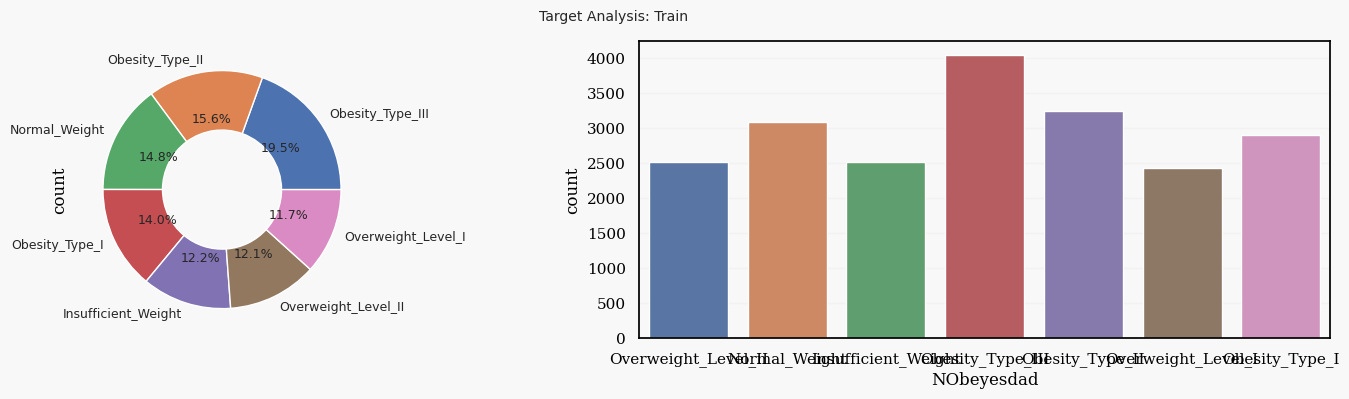

In [15]:
target_feature_plot(df_train, target_col, name='Train')

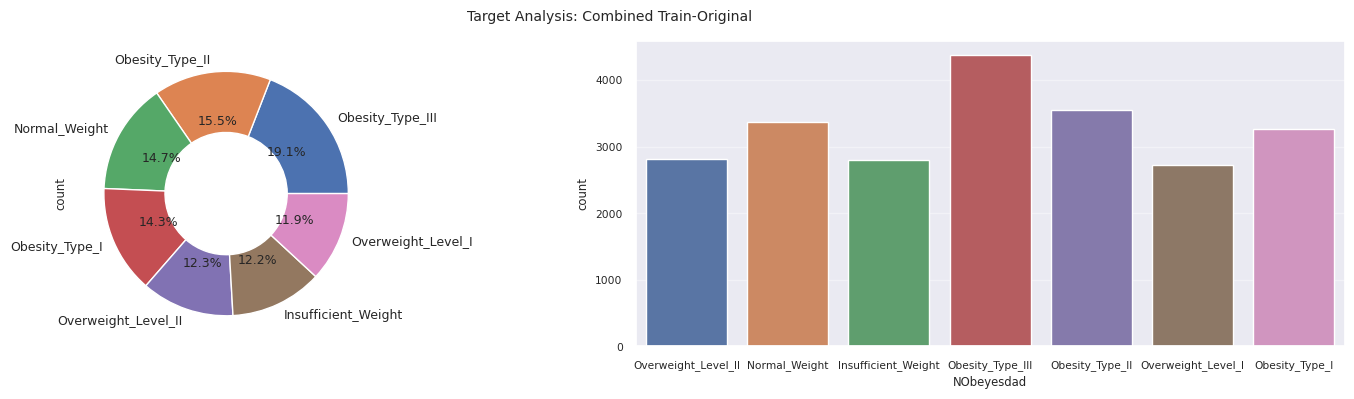

In [16]:
target_feature_plot(pd.concat([df_train, original], axis=0), target_col, name='Combined Train-Original')

## 2.2 Analysis
We can see that classes are roughly equally split which is good for us since we won't have to deal with an imbalanced dataset

<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">3. Exploratory Data Analysis</h1>
    </div></div>


In [17]:
cat_cols = df_test.columns[df_test.nunique()<=7]
num_cols = df_test.columns[df_test.nunique()>7]
cat_cols

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

## 3.1 Counts of each categorical variable
Based on the graphs below I have the following conclusions:
- Except for feature Gender, every other feature seems to have an imbalanced input, heavily in favour of 1 choice
- This makes it difficult for us to make any assumptions

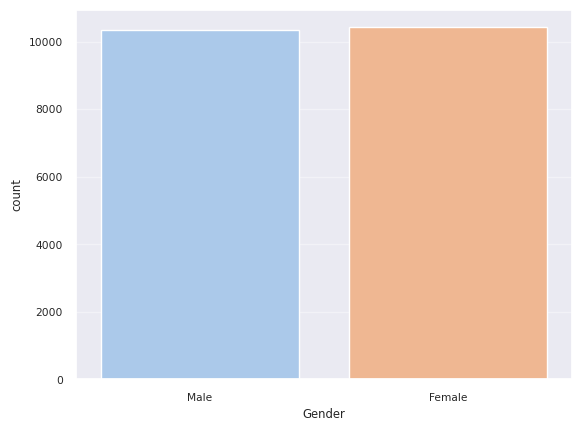

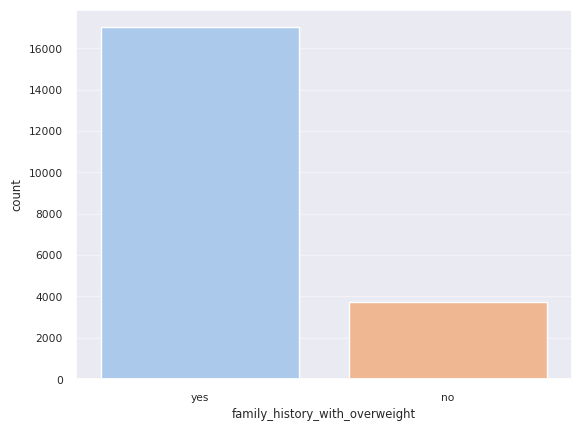

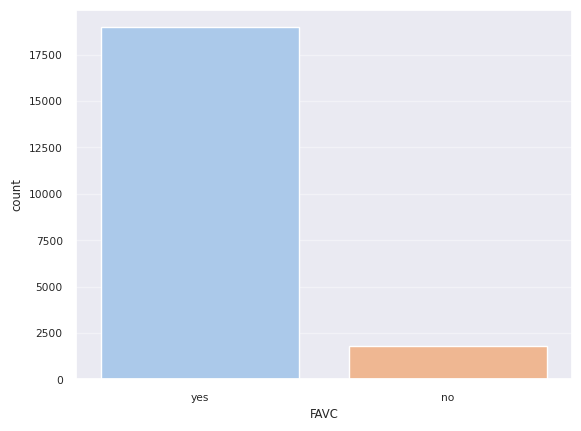

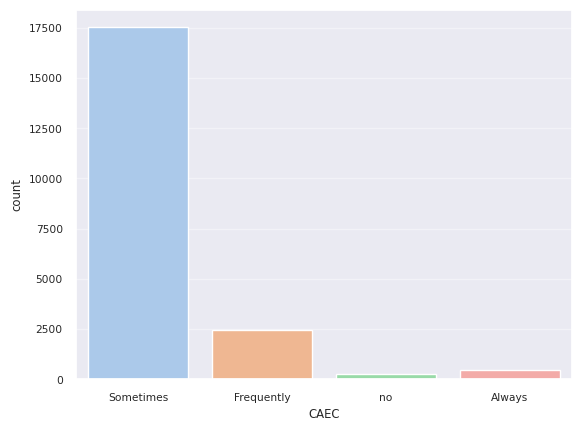

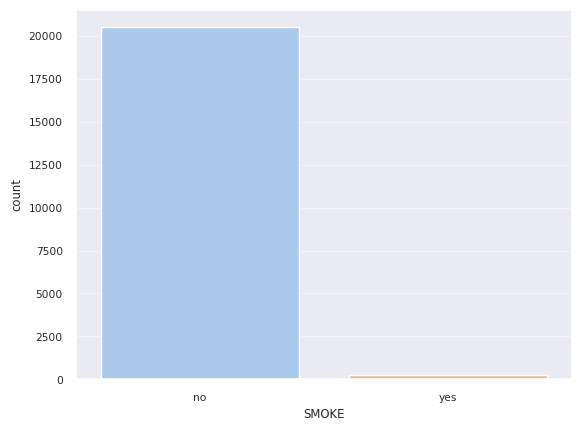

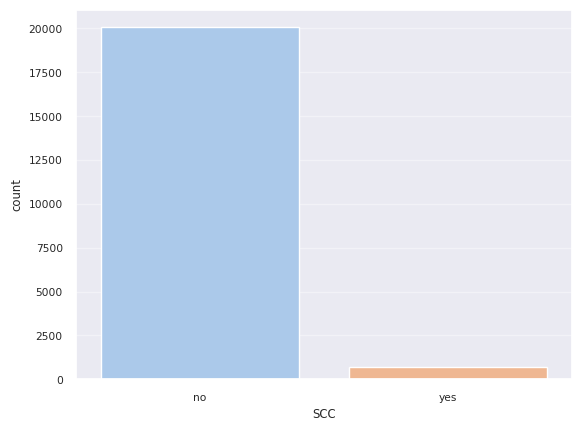

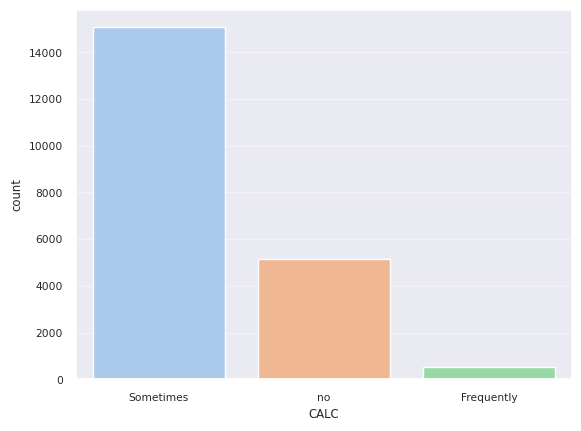

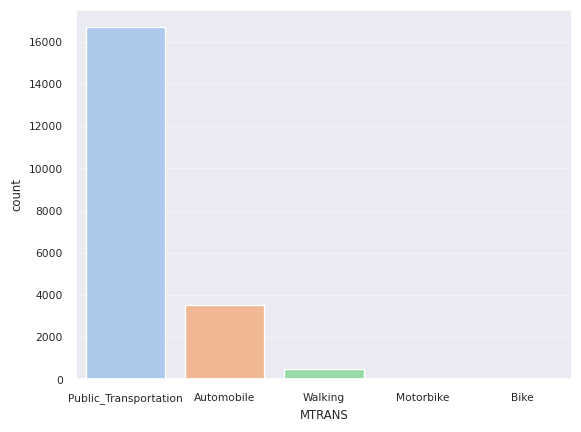

In [18]:
for col in cat_cols:
    sns.countplot(data=df_train, x=col, palette='pastel')
    print("\n")
    plt.show()

## 3.2 Target Variable count in all categorical features

Looking at the graphs below, it seems that Type 3 obesity affects Females more and type 2 obesity affects males more according to our data

<b> concluding anything else from graphs below is not correct because the results below could very easily be because of the imbalance in the feature choices that we saw above </b>


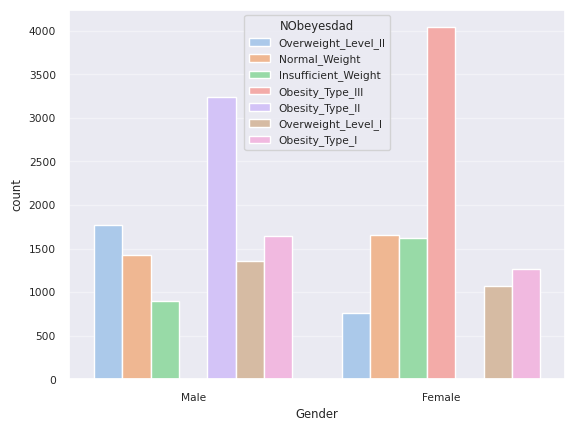

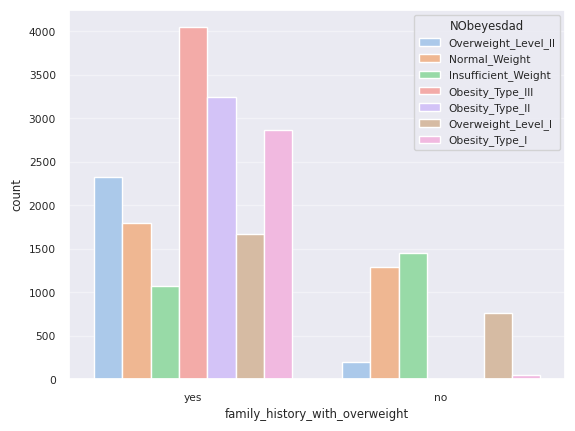

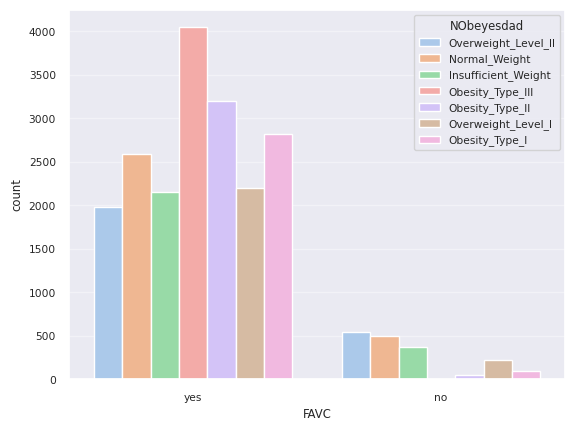

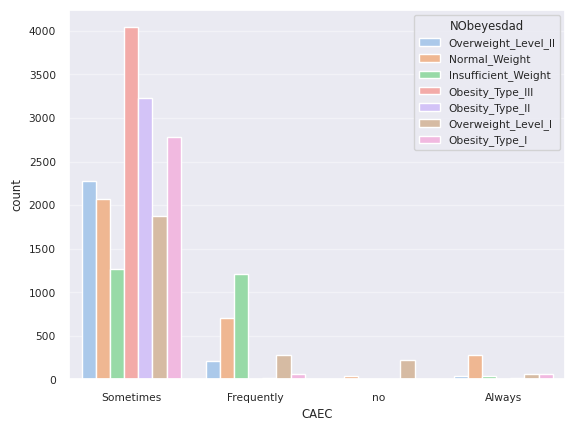

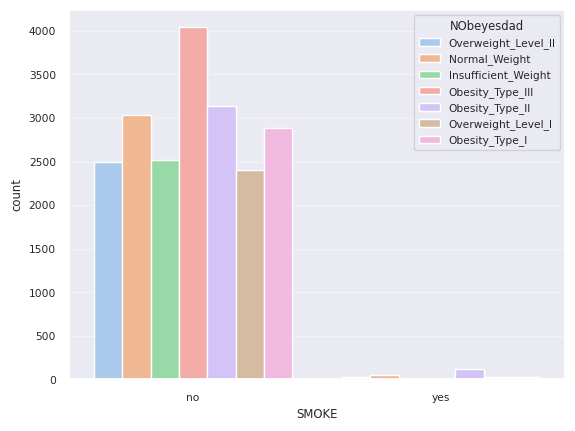

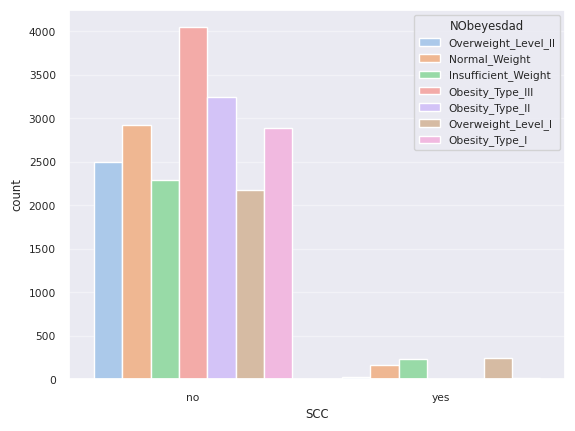

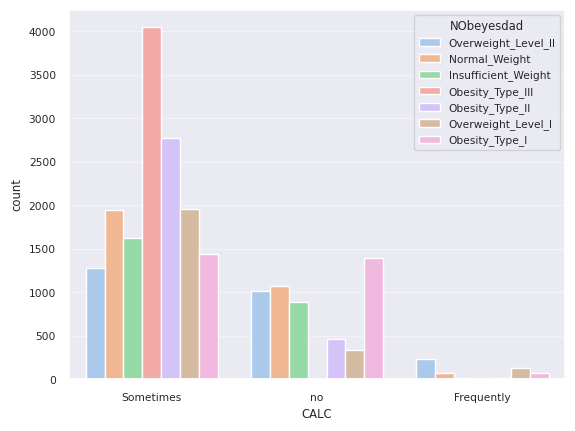

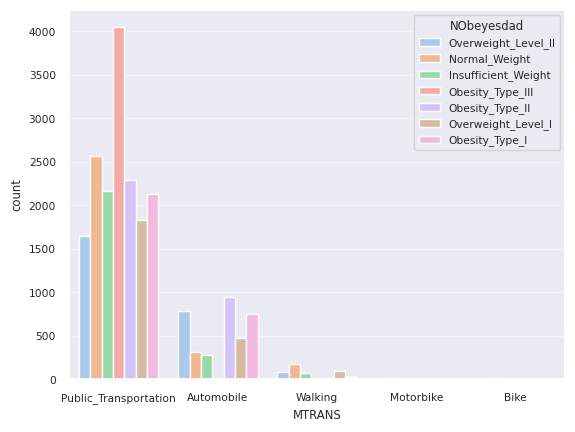

In [19]:
for col in cat_cols:
    sns.countplot(data=df_train, x=col, hue=target_col, palette='pastel')#, y=target_col)
    print("\n")
    plt.show()

## 3.3 Numerical Features

- Age seems to be skwed
- Height and weight seem to be better distribulted
- Other features are very unevenly distributed

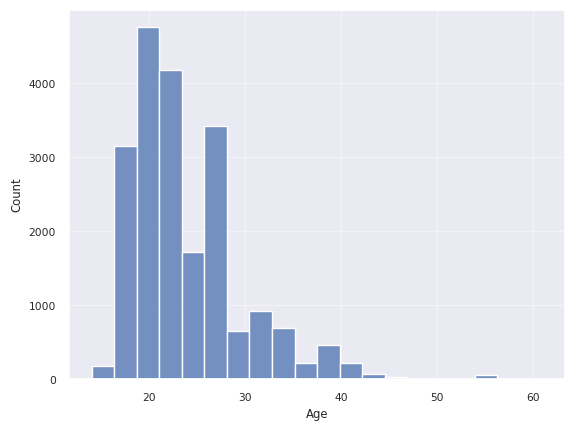

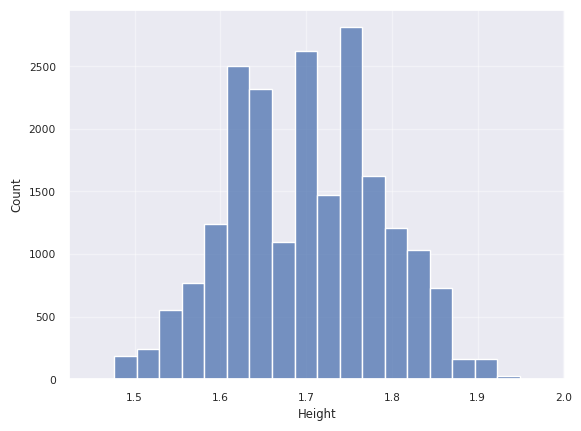

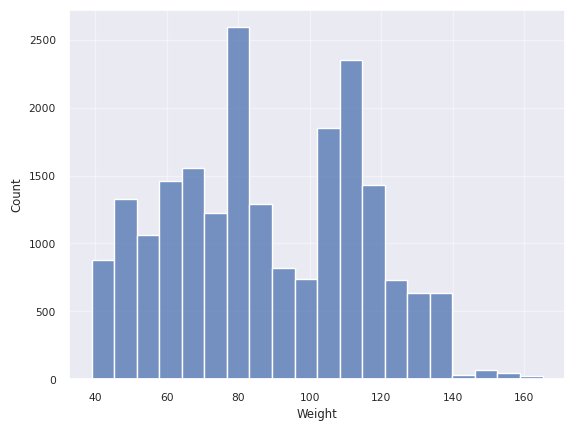

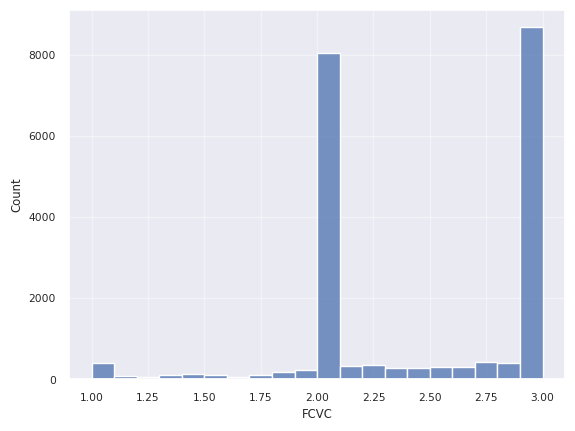

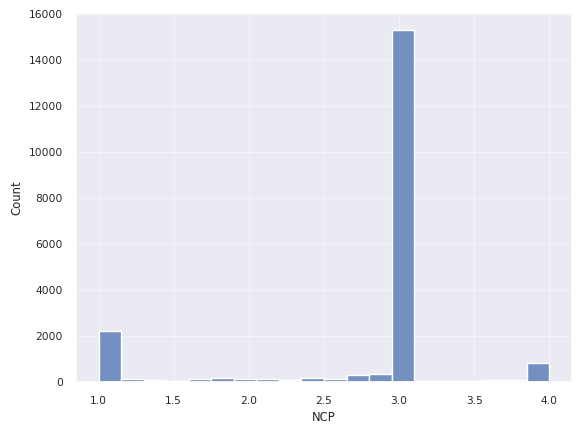

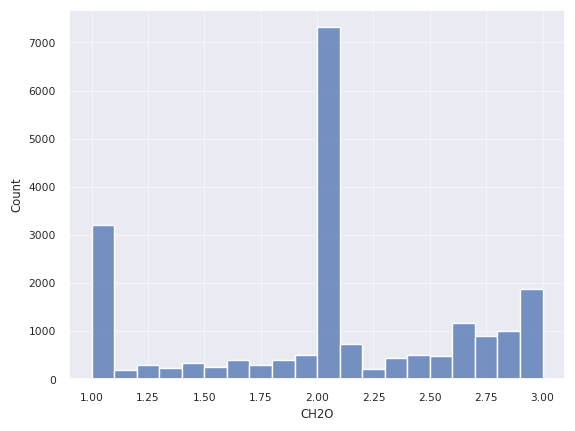

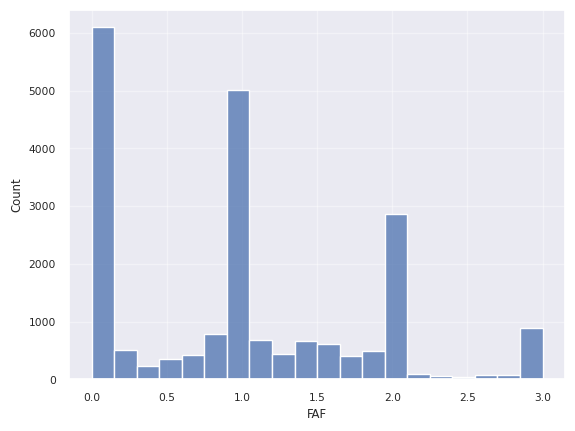

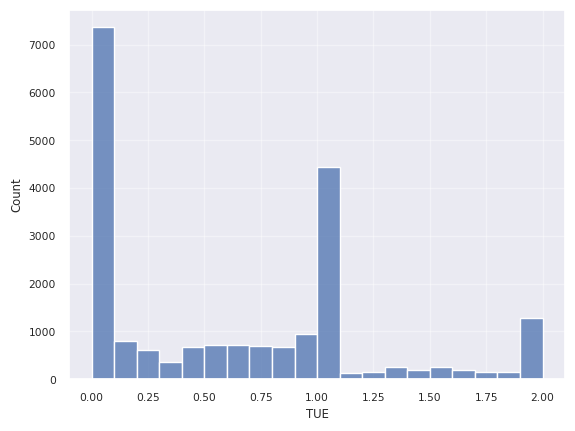

In [20]:
for cols in num_cols:
    sns.histplot(data=df_train, x=cols, bins=20, palette='pastel')
    print("\n")
    plt.show()

## 3.4 Target Variable vs Numerical Variables

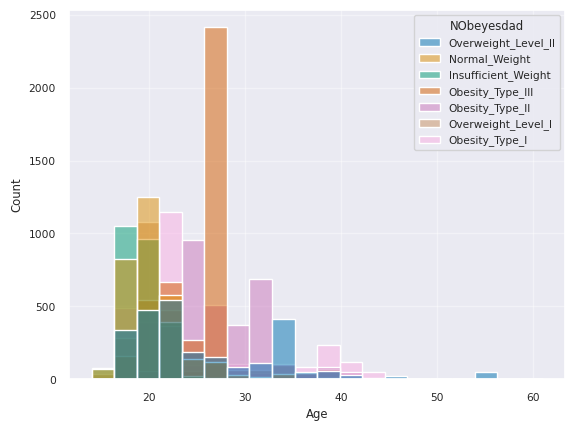

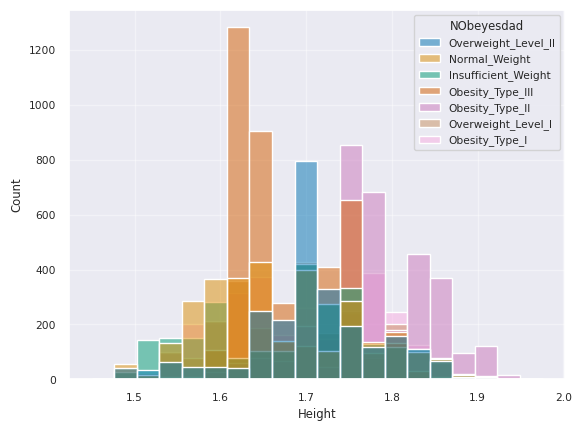

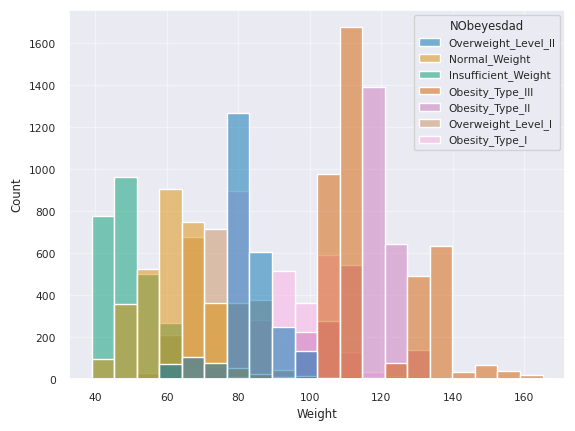

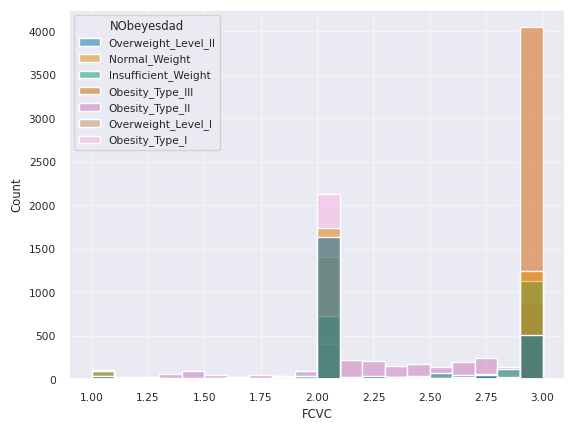

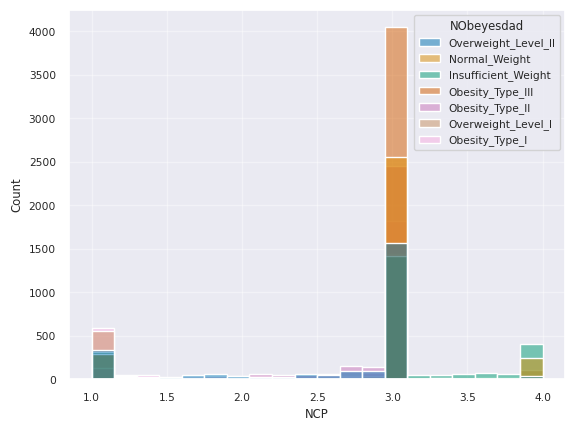

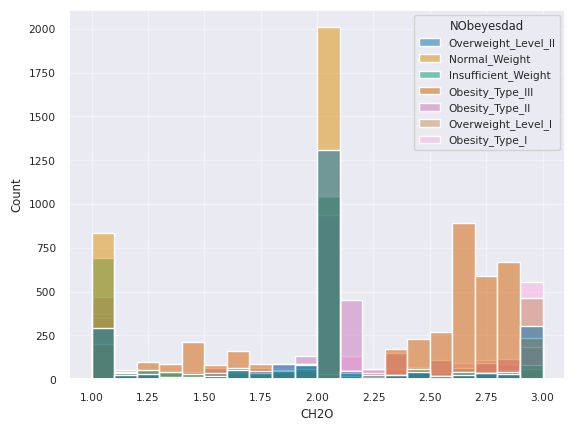

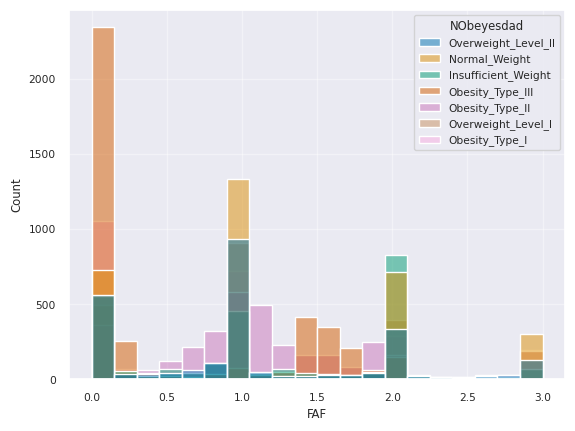

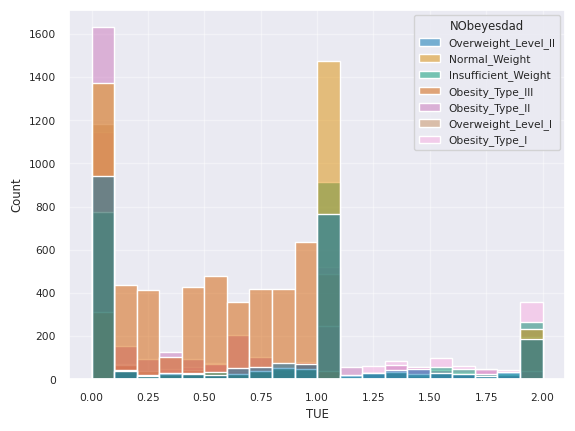

In [21]:
for cols in num_cols:
    sns.histplot(data=df_train, x=cols, bins=20, palette='colorblind', hue=target_col)
    print("\n")
    plt.show()

## 3.5 Heatmap

In [22]:
df_train_copy = df_train.copy(deep=True)
ce_oe = OrdinalEncoder()
df_train_copy[cat_cols] = ce_oe.fit_transform(df_train_copy[cat_cols])

le = LabelEncoder()
df_train_copy[target_col] = le.fit_transform(df_train_copy[target_col])

df_train_copy.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,1,2.763573,1,0.000000,0.976473,1,1,6
1,2,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,1,2.000000,1,1.000000,1.000000,2,2,1
2,2,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,1,1.910378,1,0.866045,1.673584,2,1,0
3,2,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,1,1.674061,1,1.467863,0.780199,1,1,4
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,1,1.979848,1,1.967973,0.931721,1,1,6


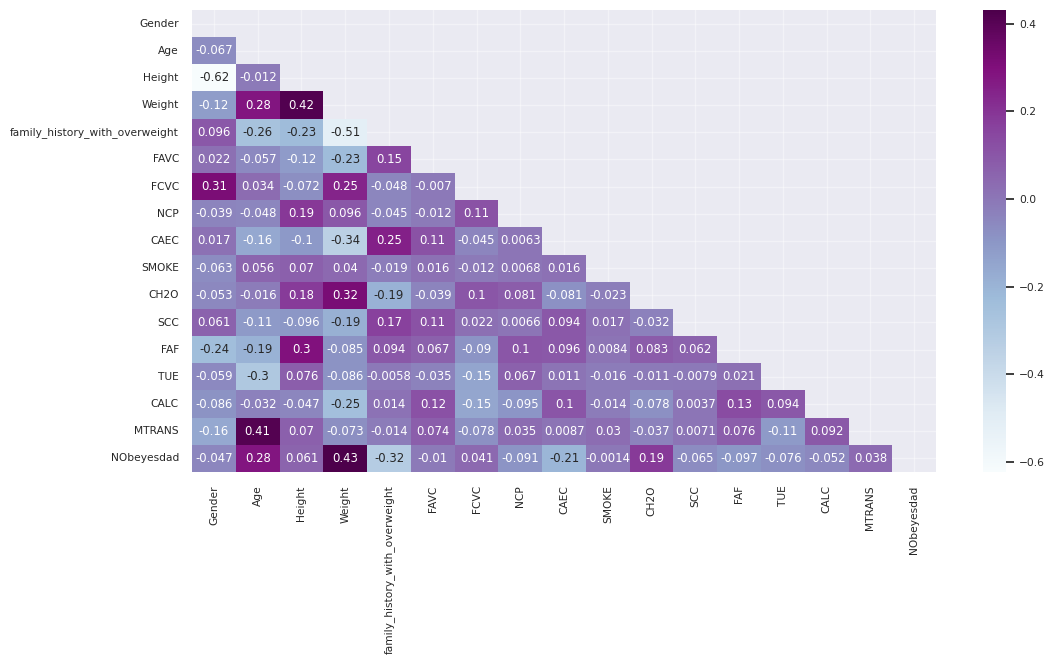

In [23]:
corr = df_train_copy.corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(12,6))
sns.heatmap(corr, mask=mask, annot=True, cmap='BuPu')
plt.show()

Strongly correlated features:
- Height vs Gender
- Family history vs Weight
- MTRANS vs Age
- Weight vs Height

Features related with Target Variable:
- Age
- Weight
- Family History
- CAEC
- CH2O


<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">4. Data Splitting</h1>
    </div></div>


In [24]:
df_test_copy = df_test.copy(deep=True)
ce_oe = OrdinalEncoder()
df_test_copy[cat_cols] = ce_oe.fit_transform(df_test_copy[cat_cols])

df_test_copy.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,
20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,1,1,2.825629,1,0.855400,0.000000,1,1
20759,2,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,1,1,3.000000,1,1.000000,0.000000,1,1
20760,2,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,1,1,2.621877,1,0.000000,0.250502,1,1
20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,1,1,2.786417,1,0.094851,0.000000,1,1
20762,2,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,1,1,2.653531,1,0.000000,0.741069,1,1


In [25]:
X_train = df_train_copy.drop([f'{target_col}'], axis=1).reset_index(drop=True)
y_train = df_train_copy[f'{target_col}'].reset_index(drop=True)
X_test = df_test_copy.reset_index(drop=True)

print(f"X_train shape :{X_train.shape} , y_train shape :{y_train.shape}")
print(f"X_test shape :{X_test.shape}")

X_train shape :(20758, 16) , y_train shape :(20758,)
X_test shape :(13840, 16)


In [26]:
#X_train['BMI'] = X_train['Weight'] / (X_train['Height'] ** 2)
#X_test['BMI'] = X_test['Weight'] / (X_test['Height'] ** 2)

In [27]:
#sc = StandardScaler()
#X_train[num_cols] = sc.fit_transform(X_train[num_cols])
#X_test[num_cols] = sc.transform(X_test[num_cols])

In [28]:
X_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,1,2.763573,1,0.000000,0.976473,1,1
1,2,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,1,2.000000,1,1.000000,1.000000,2,2
2,2,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,1,1.910378,1,0.866045,1.673584,2,1
3,2,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,1,1.674061,1,1.467863,0.780199,1,1
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,1,1.979848,1,1.967973,0.931721,1,1


In [29]:
class Splitter:
    def __init__(self, test_size=0.2, kfold=True, n_splits=5):
        self.test_size = test_size
        self.kfold = kfold
        self.n_splits = n_splits
        
    def split_data(self, X, y, random_state_list):
        if kfold:
            for random_state in random_state_list:
                kf = StratifiedKFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_idx, val_idx in kf.split(X, y):
                    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
                    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
                    yield X_train, X_val, y_train, y_val
        else:
            for random_state in random_state_list:
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=self.test_size, random_state=random_state)
                yield X_train, X_val, y_train, y_val


kfold = True
n_splits = 10
random_state = 4228
random_state_list = [8828] # used by split_data
n_estimators = 9999 # 9999
early_stopping_rounds = 100
verbose = False
device = 'cpu'

splitter = Splitter(kfold=kfold, n_splits=n_splits)        

In [30]:
class Classifier:
    def __init__(self, n_estimators=100, random_state=0, device="cpu"):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.len_models = len(self.models)
        
    def _define_model(self):
        lgb_params1 = {
                "objective": "multiclass",
                "metric": "multi_logloss",
                "verbosity": -1,
                "boosting_type": "gbdt",
                "num_class": 7,
                "lambda_l1": 2.0807876056438017e-06,
                "lambda_l2": 5.534843238749359e-07,
                "num_leaves": 188,
                "feature_fraction": 0.7004235334383486,
                "bagging_fraction": 0.7313976216112742,
                "bagging_freq": 5,
                "min_child_samples": 46,
            }
    
        xgb_params1 = {
                'objective'             : 'multi:softprob',
                'num_classes'           : 7,
                'eval_metric'           : "mlogloss",
                'random_state'          : random_state,
                'colsample_bytree'      : 0.3756966579377608,
                'learning_rate'         : 0.46962444326235553,
                'gamma'                 : 0.472547772700957,
                'max_depth'             : 4,
                'n_estimators'          : 1100,                         
                'reg_alpha'             : 0.3067382060405643,
                'reg_lambda'            : 0.7226284404634015,
                'min_child_weight'      : 8,
                'early_stopping_rounds' : 200,
                'verbosity'             : 0,
            }

        
        xgb_params2 = {
                'objective'             : 'multi:softprob',
                'num_classes'           : 7,
                'eval_metric'           : "mlogloss",
                'random_state'          : random_state,
                'colsample_bytree'      : 0.39580335705398706,
                'learning_rate'         : 0.1450940131780005,
                'gamma'                 : 0.1351404212584113,
                'max_depth'             : 4,
                'n_estimators'          : 1100,                         
                'reg_alpha'             : 0.5376259975626143,
                'reg_lambda'            : 0.6060470205553703,
                'min_child_weight'      : 7,
                'early_stopping_rounds' : 200,
                'verbosity'             : 0,
            }

        lgb_params2 = {
                "objective": "multiclass",
                "metric": "multi_logloss",
                "verbosity": -1,
                "boosting_type": "gbdt",
                "num_class": 7,
                "lambda_l1": 0.6359962819636166,
                "lambda_l2": 0.00269666967110661,
                "num_leaves": 129,
                "feature_fraction": 0.5206282833432869,
                "bagging_fraction": 0.9031486541408681,
                "bagging_freq": 2,
                "min_child_samples": 97,
            }

        cb_params1 = {
              'objective'           : 'MultiClass',
              'eval_metric'         : "Accuracy",
              'bagging_temperature' : 0.5777339558193401,
              'colsample_bylevel'   : 0.33197007912277515,
              'iterations'          : 1000,
              'learning_rate'       : 0.41243963114061605,
              'od_wait'             : 12,
              'max_depth'           : 7,
              'l2_leaf_reg'         : 0.5152918814609156,
              'min_data_in_leaf'    : 15,
              'random_strength'     : 0.1, 
              'max_bin'             : 100,
              'verbose'             : 0,
              'use_best_model'      : True,
            }
        
        cb_params2 = {
              'objective'           : 'MultiClass',
              'eval_metric'         : "Accuracy",
              'bagging_temperature' : 0.4888081569016488,
              'colsample_bylevel'   : 0.38417552977933506,
              'iterations'          : 1000,
              'learning_rate'       : 0.6660149202597461,
              'od_wait'             : 12,
              'max_depth'           : 7,
              'l2_leaf_reg'         : 0.4691230949546976,
              'min_data_in_leaf'    : 15,
              'random_strength'     : 0.1, 
              'max_bin'             : 100,
              'verbose'             : 0,
              'use_best_model'      : True,
            }


        models = {
            #'svc': SVC(gamma="auto", probability=True, random_state=self.random_state),
            #'xgb1': xgb.XGBClassifier(**xgb_params1),
            #'lgb1': lgb.LGBMClassifier(**lgb_params1),
            'xgb2': xgb.XGBClassifier(**xgb_params2),
            'lgb2': lgb.LGBMClassifier(**lgb_params2),
            #'cat1': CatBoostClassifier(**cb_params1),
            #'cat2': CatBoostClassifier(**cb_params2),
            #'brf': BalancedRandomForestClassifier(n_estimators=4000, n_jobs=-1, random_state=self.random_state),
            #'rf': RandomForestClassifier(n_estimators=1000, random_state=self.random_state),
        }
        
        return models

<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">5. Optimizer</h1>
    </div></div>


In [31]:
class OptunaWeights:
    def __init__(self, random_state, n_trials=3000):
        self.study = None
        self.weights = None
        self.random_state = random_state
        self.n_trials = n_trials
        
    def _objective(self, trial, y_true, y_preds):
        weights = [trial.suggest_float(f"weight{n}", 0, 1) for n in range(len(y_preds))]
        weighted_preds = np.average(np.array(y_preds), weights=weights, axis=0)
        weighted_preds  = weighted_preds / weighted_preds.sum(axis=0, keepdims = True) # check
        score = accuracy_score(y_true, weighted_preds.astype(int)) #np.argmax(weighted_preds, axis=1))
        return score
    
    def fit(self, y_true, y_preds):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        #pruner = optuna.pruners.HyperbandPruner()
        self.study = optuna.create_study(sampler=sampler, direction="maximize", study_name="Weights")
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=self.n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]
        
    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_preds = np.average(np.array(y_preds), weights=self.weights, axis=0)
        return weighted_preds
    
    def fit_predict(self, y_true, y_preds):
        self.fit(y_true, y_preds)
        return self.predict(y_preds)
    
    def weights(self):
        return self.weights
    
    

<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">6. Model Training</h1>
    </div></div>


In [32]:
base_model_num = Classifier().len_models

models = []
best_iterations = []
scores = []
oof_predss = np.zeros((X_train.shape[0], base_model_num))
test_predss = np.zeros((X_test.shape[0], base_model_num))

trained_models = {'xgb1':[], 'lgb1':[], 'xgb2':[], 'lgb2':[]} #, 'cat1':[], 'cat2':[]}

for i, (X_train_, X_val, y_train_, y_val) in enumerate(splitter.split_data(X_train, 
                                                                           y_train, 
                                                                           random_state_list = random_state_list)):
    n = i % n_splits
    m = i // n_splits
    
    clf = Classifier(n_estimators, random_state, device)
    models = clf.models
    
    oof_preds = []
    test_preds = []
    
    for name, model in models.items():
        if name in ['lgb1', 'lgb2', 'cat1', 'cat2']:
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)])
        elif name in ['xgb1', 'xgb2']:
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], verbose=verbose)
        else:
            model.fit(X_train_, y_train_)
        
        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))
        
        y_val_pred = model.predict(X_val)
        test_pred = model.predict(X_test)
        
        score = accuracy_score(y_val, y_val_pred) #(sp.csr_matrix(y_val).toarray() ,sp.csr_matrix(y_val_pred).toarray())
        
        print(f'Base MODEL {name} [FOLD-{n} SEED-{random_state_list[m]}] accuracy score: {score:.5f}')
        
        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
    
    oof_preds = np.column_stack(oof_preds)
    oof_predss[X_val.index] = oof_preds
    test_preds = np.column_stack(test_preds)
    test_predss += test_preds / (n_splits * len(random_state_list))
    
    i += 1
gc.collect()
    

Base MODEL xgb2 [FOLD-0 SEED-8828] accuracy score: 0.91570
Base MODEL lgb2 [FOLD-0 SEED-8828] accuracy score: 0.91522
Base MODEL xgb2 [FOLD-1 SEED-8828] accuracy score: 0.91426
Base MODEL lgb2 [FOLD-1 SEED-8828] accuracy score: 0.91522
Base MODEL xgb2 [FOLD-2 SEED-8828] accuracy score: 0.91185
Base MODEL lgb2 [FOLD-2 SEED-8828] accuracy score: 0.91281
Base MODEL xgb2 [FOLD-3 SEED-8828] accuracy score: 0.90414
Base MODEL lgb2 [FOLD-3 SEED-8828] accuracy score: 0.90751
Base MODEL xgb2 [FOLD-4 SEED-8828] accuracy score: 0.91426
Base MODEL lgb2 [FOLD-4 SEED-8828] accuracy score: 0.91570
Base MODEL xgb2 [FOLD-5 SEED-8828] accuracy score: 0.91233
Base MODEL lgb2 [FOLD-5 SEED-8828] accuracy score: 0.90318
Base MODEL xgb2 [FOLD-6 SEED-8828] accuracy score: 0.91522
Base MODEL lgb2 [FOLD-6 SEED-8828] accuracy score: 0.90896
Base MODEL xgb2 [FOLD-7 SEED-8828] accuracy score: 0.90751
Base MODEL lgb2 [FOLD-7 SEED-8828] accuracy score: 0.90607
Base MODEL xgb2 [FOLD-8 SEED-8828] accuracy score: 0.910

51757

In [33]:
meta_test_predss = np.zeros(X_test.shape[0])
ensemble_score = []
weights = []

for i, (X_train_, X_val, y_train_, y_val) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits
    train_idx, val_idx = X_train_.index, X_val.index
    
    X_train_ = oof_predss[train_idx]
    X_val = oof_predss[val_idx]
    
    clf = Classifier(n_estimators, random_state, device)
    #m0 = 
    meta_models = clf.models
    
    oof_preds = []
    test_preds = []
    
    for name, models in meta_models.items():
        model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)])
        y_val_pred = model.predict(X_val)
        test_pred = model.predict(test_predss)
        score = accuracy_score(y_val, y_val_pred) 
        
        print(f'Meta MODEL {name} [FOLD-{n} SEED-{random_state_list[m]}] accuracy score: {score:.5f}')
        
        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
        
    optweights = OptunaWeights(random_state=random_state)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
    score = accuracy_score(y_val, y_val_pred.astype(int).T)
    print(f'Ensemble MODEL [FOLD-{n} SEED-{random_state_list[m]}] accuracy score {score:.5f}')
    ensemble_score.append(score)
    weights.append(optweights.weights)
    meta_test_predss = optweights.predict(test_preds) #/ (n_splits)) # * len(random_state_list))
    
    i+=1

gc.collect()    

Meta MODEL xgb2 [FOLD-0 SEED-8828] accuracy score: 0.91329
Meta MODEL lgb2 [FOLD-0 SEED-8828] accuracy score: 0.91329
Ensemble MODEL [FOLD-0 SEED-8828] accuracy score 0.91329
Meta MODEL xgb2 [FOLD-1 SEED-8828] accuracy score: 0.91763
Meta MODEL lgb2 [FOLD-1 SEED-8828] accuracy score: 0.91763
Ensemble MODEL [FOLD-1 SEED-8828] accuracy score 0.91763
Meta MODEL xgb2 [FOLD-2 SEED-8828] accuracy score: 0.91137
Meta MODEL lgb2 [FOLD-2 SEED-8828] accuracy score: 0.91137
Ensemble MODEL [FOLD-2 SEED-8828] accuracy score 0.91137
Meta MODEL xgb2 [FOLD-3 SEED-8828] accuracy score: 0.90511
Meta MODEL lgb2 [FOLD-3 SEED-8828] accuracy score: 0.90511
Ensemble MODEL [FOLD-3 SEED-8828] accuracy score 0.90511
Meta MODEL xgb2 [FOLD-4 SEED-8828] accuracy score: 0.91281
Meta MODEL lgb2 [FOLD-4 SEED-8828] accuracy score: 0.91281
Ensemble MODEL [FOLD-4 SEED-8828] accuracy score 0.91281
Meta MODEL xgb2 [FOLD-5 SEED-8828] accuracy score: 0.90800
Meta MODEL lgb2 [FOLD-5 SEED-8828] accuracy score: 0.90800
Ensembl

127030

In [34]:
# Calculate the mean LogLoss score of the ensemble
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'Ensemble Logloss score {mean_score:.5f} ± {std_score:.5f}')

# Print the mean and standard deviation of the ensemble weights for each model
print('--- Model Weights ---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)
for name, mean_weight, std_weight in zip(meta_models.keys(), mean_weights, std_weights):
    print(f'{name}: {mean_weight:.5f} ± {std_weight:.5f}')

Ensemble Logloss score 0.91068 ± 0.00370
--- Model Weights ---
xgb2: 0.40875 ± 0.00000
lgb2: 0.42183 ± 0.00000


<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">7. Feature Importance</h1>
    </div></div>


In [35]:
def visualize_importance(models, feature_cols, title, head=10):
    importances = []
    feature_importance = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df["importance"] = model.feature_importances_
        _df["feature"] = pd.Series(feature_cols)
        _df["fold"] = i
        _df = _df.sort_values('importance', ascending=False)
        _df = _df.head(head)
        feature_importance = pd.concat([feature_importance, _df], axis=0, ignore_index=True)
        
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    # display(feature_importance.groupby(["feature"]).mean().reset_index().drop('fold', axis=1))
    plt.figure(figsize=(18, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance, color='skyblue', errorbar='sd')
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.title(f'{title} Feature Importance', fontsize=18)
    plt.grid(True, axis='x')
    plt.show()
    
#for name, models in trained_models.items():
 #   visualize_importance(models, list(X_train.columns), name)


<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">8. Submission</h1>
    </div></div>


In [36]:
submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv", index_col=None)

In [37]:
submit = pd.DataFrame(meta_test_predss.astype(int), columns = ['target'])
submit['id'] = submission['id']
submit = submit[['id','target']]
le_target_map = dict(zip(le.transform(le.classes_), le.classes_))
le_target_map

{0: 'Insufficient_Weight',
 1: 'Normal_Weight',
 2: 'Obesity_Type_I',
 3: 'Obesity_Type_II',
 4: 'Obesity_Type_III',
 5: 'Overweight_Level_I',
 6: 'Overweight_Level_II'}

In [38]:
submit['NObeyesdad'] = submit['target'].apply(lambda x: le_target_map[x])
submit = submit[['id','NObeyesdad']]

In [39]:
submit

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Obesity_Type_II
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [40]:
submit.to_csv("submission.csv", index=False)